<a href="https://colab.research.google.com/github/ahmadxcix/Software-Requirements-Classification/blob/main/SoftwareRequirementsClassification_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Software Requirement Classifications**
**Ahmed Badawood 201771730 & Khaled Araj 201726790**

**ICS 485 Project**

The idea of this project is to classify software requirements for 15 projects in the dataset with 12 classes for classify each requirement such as Functional, Usability, Security ... etc.

We will start importing the libraries including numpy, pandas, matplotlib ... etc. And tensorflow. Then, linking the dataset with this file.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd '/content/drive/MyDrive/Colab Notebooks/ICS485/PROJECT'

/content/drive/MyDrive/Colab Notebooks/ICS485/PROJECT


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sklearn.metrics
import nltk
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from bs4 import BeautifulSoup
from collections import Counter
from imblearn.over_sampling import SMOTE


plt.style.use('ggplot')
nltk.download('stopwords')
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Prepare The Data
**Here**, we added the dataset path to the file and printed the first and last 5 rows to make sure it's connected successfully.

You can see the number of rows and columns below the schedule.

In [4]:
file_path = "/content/drive/MyDrive/Colab Notebooks/ICS485/PROJECT/SoftwareRequirementsClassification.xlsx"
df = pd.read_excel(file_path, usecols="B:C")
df

,Requirement,Label
0,'The system shall refresh the display every 60...,PE
1,'The application shall match the color of the ...,LF
2,' If projected the data must be readable. On a...,US
3,' The product shall be available during normal...,A
4,' If projected the data must be understandable...,US
...,...,...
619,'\tUser access should be limited to the permis...,SE
620,' The product must comply with the intranet pa...,LF
621,' The intranet pages should display appropriat...,LF
622,' The users should be able to easily use the s...,US


In [5]:
df.Label.value_counts()

F     254
US     67
SE     66
O      62
PE     54
LF     38
SC     21
A      21
MN     17
L      13
FT     10
PO      1
Name: Label, dtype: int64

In [6]:
df[df['Label']=='PO'].index

Int64Index([53], dtype='int64')

In [7]:
df.drop(53, inplace=True)
df.Label.value_counts()

F     254
US     67
SE     66
O      62
PE     54
LF     38
SC     21
A      21
MN     17
L      13
FT     10
Name: Label, dtype: int64

In [8]:
labels = df['Label'].drop_duplicates().to_numpy()
labels

array(['PE', 'LF', 'US', 'A', 'SE', 'F', 'FT', 'SC', 'O', 'L', 'MN'],
      dtype=object)

In [9]:
def print_plot(index):
    example = df[df.index == index][['Requirement', 'Label']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Label:', example[1])
print_plot(10)


'The system shall display the Events in a graph by time.'
Label: F


In [10]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(nltk.corpus.stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text

In [11]:
df['Requirement'] = df['Requirement'].apply(clean_text)
print_plot(10)

system shall display events graph time
Label: F


In [12]:
X = df.Requirement.to_numpy()
y = df.Label.to_numpy()
train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size =0.30, random_state=0)
test_data, valid_data, test_labels, valid_labels = train_test_split(test_data, test_labels, test_size =0.5, random_state=0)

In [13]:
train_data.shape, test_data.shape, valid_data.shape

((436,), (93,), (94,))

# Balancing
**Since the dataset is imbalanced, we will implement an library (SMOTE) to balance the train data only, so we won't face any problems in classification**

Before Balancing the Data
Class=SE, n=43 (9.862%)
Class=F, n=182 (41.743%)
Class=US, n=49 (11.239%)
Class=PE, n=42 (9.633%)
Class=A, n=15 (3.440%)
Class=L, n=7 (1.606%)
Class=O, n=40 (9.174%)
Class=LF, n=30 (6.881%)
Class=SC, n=13 (2.982%)
Class=FT, n=5 (1.147%)
Class=MN, n=10 (2.294%)


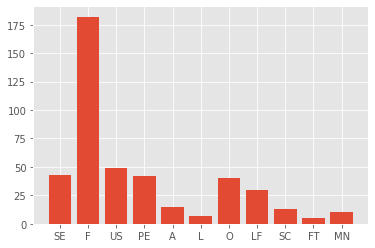



After Balancing the Data
Class=SE, n=182 (9.091%)
Class=F, n=182 (9.091%)
Class=US, n=182 (9.091%)
Class=PE, n=182 (9.091%)
Class=A, n=182 (9.091%)
Class=L, n=182 (9.091%)
Class=O, n=182 (9.091%)
Class=LF, n=182 (9.091%)
Class=SC, n=182 (9.091%)
Class=FT, n=182 (9.091%)
Class=MN, n=182 (9.091%)


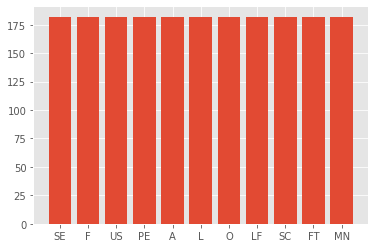

In [14]:
print("Before Balancing the Data")
counter = Counter(train_labels)
for k,v in counter.items():
	per = v / len(train_labels) * 100
	print('Class={}, n={} ({:.3f}%)'.format(k, v, per))
# plot the distribution
plt.bar(list(counter.keys()), counter.values())
plt.show()

# transform the dataset
vec = TfidfVectorizer()

# vectorize the words 
X_train  = vec.fit_transform(train_data).toarray()
X_test   = vec.transform(test_data).toarray()
X_valid  = vec.transform(valid_data).toarray()

# just for convenient
y_train = train_labels
y_test  = test_labels
y_valid = valid_labels

# resample the training data
sm = SMOTE(k_neighbors = 1, random_state = 0)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train) 


print("\n\nAfter Balancing the Data")
counter = Counter(y_train_res)
for k,v in counter.items():
	per = v / len(y_train_res) * 100
	print('Class={}, n={} ({:.3f}%)'.format(k, v, per))
# plot the distribution
plt.bar(list(counter.keys()), counter.values())
plt.show()

In [15]:
X_train_res.shape, y_train_res.shape, X_test.shape, y_test.shape, X_valid.shape, y_valid.shape

((2002, 1328), (2002,), (93, 1328), (93,), (94, 1328), (94,))

# One-Hot-Encoding

In [16]:
le = LabelEncoder()
le.fit(y_train_res)
def covert_to_onehot(y):
    y  = le.transform(y)
    enc = np.zeros((y.shape[0], 11))
    for i in range(y.shape[0]):
      if y[i] == 0:
        enc[i, 0] = 1
      elif y[i] == 1:
        enc[i, 1] = 1
      elif y[i] == 2:
        enc[i, 2] = 1
      elif y[i] == 3:
        enc[i, 3] = 1
      elif y[i] == 4:
        enc[i, 4] = 1
      elif y[i] == 5:
        enc[i, 5] = 1
      elif y[i] == 6:
        enc[i, 6] = 1
      elif y[i] == 7:
        enc[i, 7] = 1
      elif y[i] == 8:
        enc[i, 8] = 1
      elif y[i] == 9:
        enc[i, 9] = 1
      elif y[i] == 10:
        enc[i, 10] = 1
    return enc

In [17]:
y_train_res.shape, y_test.shape, y_valid.shape

((2002,), (93,), (94,))

In [18]:
y_train_res = covert_to_onehot(y_train_res)
y_test  = covert_to_onehot(y_test)
y_valid = covert_to_onehot(y_valid)

In [19]:
y_train_res.shape, y_test.shape, y_valid.shape

((2002, 11), (93, 11), (94, 11))

# Start Training
**in this section, we will start training the data and split train, validation, and test data**

In [20]:
trainx = X_train_res
trainy = y_train_res

validx = X_valid
validy = y_valid

testx = X_test
testy = y_test

In [21]:
trainx.shape, trainy.shape, validx.shape, validy.shape, testx.shape, testy.shape

((2002, 1328), (2002, 11), (94, 1328), (94, 11), (93, 1328), (93, 11))

In [22]:
X=trainx
Y=trainy

## Models

### Multinomial Naive Bayes

In [23]:
from sklearn.naive_bayes import MultinomialNB
X_train_val_merge = np.vstack([trainx, validx])
y_train_val_merge = np.vstack([trainy, validy])

nb = MultinomialNB()
nb.fit(X_train_val_merge, np.argmax(y_train_val_merge, axis=1))
y_pred = nb.predict(testx)

print('accuracy %s' % sklearn.metrics.accuracy_score(y_pred, np.argmax(testy, axis=1)))

accuracy 0.7526881720430108


### KNN

#### Fine Tuning

**KNN algorithm**

**Implementing KNN algorithm below for training and validation data and plot the results from 3 to 33** *italicized text*

Setting n_neighbors=3, train_loss=0.97, val_acc=0.56
Setting n_neighbors=5, train_loss=0.96, val_acc=0.50
Setting n_neighbors=7, train_loss=0.95, val_acc=0.50
Setting n_neighbors=9, train_loss=0.93, val_acc=0.43
Setting n_neighbors=11, train_loss=0.92, val_acc=0.45
Setting n_neighbors=13, train_loss=0.91, val_acc=0.40
Setting n_neighbors=15, train_loss=0.90, val_acc=0.38
Setting n_neighbors=17, train_loss=0.88, val_acc=0.39
Setting n_neighbors=19, train_loss=0.86, val_acc=0.37
Setting n_neighbors=21, train_loss=0.85, val_acc=0.33
Setting n_neighbors=23, train_loss=0.84, val_acc=0.32
Setting n_neighbors=25, train_loss=0.84, val_acc=0.32
Setting n_neighbors=27, train_loss=0.83, val_acc=0.30
Setting n_neighbors=29, train_loss=0.82, val_acc=0.29
Setting n_neighbors=31, train_loss=0.80, val_acc=0.28
Setting n_neighbors=33, train_loss=0.79, val_acc=0.29


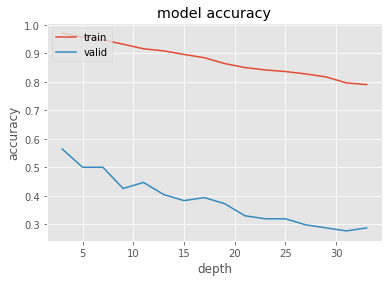


Best setting n_neighbors=3, val_acc=0.56


In [24]:
from sklearn.neighbors import KNeighborsRegressor
neighbors = [i for i in range(3, 35, 2)]

acc_train, acc_valid = [], []
best_n = 3
best_acc = 0.0
for n in neighbors:
    knn = KNeighborsRegressor(n_neighbors=n)
    knn.fit(X, Y)

    y_pred_on_train = knn.predict(trainx)
    train_acc = sklearn.metrics.accuracy_score(np.argmax(y_pred_on_train, axis=1), np.argmax(trainy, axis=1))
    acc_train.append(train_acc)

    y_pred_on_valid = knn.predict(validx)
    val_acc = sklearn.metrics.accuracy_score(np.argmax(y_pred_on_valid, axis=1), np.argmax(validy, axis=1))
    acc_valid.append(val_acc)


    print("Setting n_neighbors={}, train_loss={:.2f}, val_acc={:.2f}".format(n, train_acc, val_acc))
    if val_acc > best_acc:
        best_n = n
        best_acc = val_acc


plt.plot(neighbors, acc_train)
plt.plot(neighbors, acc_valid)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('depth')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()



print("\nBest setting n_neighbors={}, val_acc={:.2f}".format(best_n, best_acc))

#### Testing

**Testing the KNN and figuring out the best KNN number in accuracy**

In [25]:
X_train_val_merge = np.vstack([trainx, validx])
y_train_val_merge = np.vstack([trainy, validy])

knn = KNeighborsRegressor(n_neighbors=best_n)
knn.fit(X_train_val_merge, y_train_val_merge)

y_pred_on_test = knn.predict(testx)
test_acc = sklearn.metrics.accuracy_score(np.argmax(y_pred_on_test, axis=1), np.argmax(testy, axis=1))


print("Best setting n_neighbors={}, test_acc={:.2f}".format(best_n, test_acc))

Best setting n_neighbors=3, test_acc=0.67


### DecisionTreeRegressor

#### Fine Tuning

**Using Decision Tree algorithm to find the train and validation accuracy from 3 to 29 and plotting the result**

The Criterion is squared_error:
Setting depth=3, train_acc=0.33, val_acc=0.06
Setting depth=4, train_acc=0.40, val_acc=0.07
Setting depth=5, train_acc=0.46, val_acc=0.09
Setting depth=6, train_acc=0.53, val_acc=0.21
Setting depth=7, train_acc=0.58, val_acc=0.46
Setting depth=8, train_acc=0.62, val_acc=0.47
Setting depth=9, train_acc=0.65, val_acc=0.46
Setting depth=10, train_acc=0.68, val_acc=0.46
Setting depth=11, train_acc=0.70, val_acc=0.49
Setting depth=12, train_acc=0.73, val_acc=0.50
Setting depth=13, train_acc=0.76, val_acc=0.53
Setting depth=14, train_acc=0.79, val_acc=0.53
Setting depth=15, train_acc=0.80, val_acc=0.54
Setting depth=16, train_acc=0.81, val_acc=0.55
Setting depth=17, train_acc=0.83, val_acc=0.55
Setting depth=18, train_acc=0.84, val_acc=0.51
Setting depth=19, train_acc=0.85, val_acc=0.51
Setting depth=20, train_acc=0.87, val_acc=0.51
Setting depth=21, train_acc=0.89, val_acc=0.53
Setting depth=22, train_acc=0.90, val_acc=0.53
Setting depth=23, train_acc=0.91, v

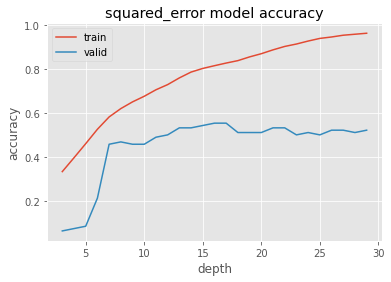

The Criterion is friedman_mse:
Setting depth=3, train_acc=0.12, val_acc=0.03
Setting depth=4, train_acc=0.12, val_acc=0.03
Setting depth=5, train_acc=0.13, val_acc=0.03
Setting depth=6, train_acc=0.13, val_acc=0.03
Setting depth=7, train_acc=0.13, val_acc=0.03
Setting depth=8, train_acc=0.14, val_acc=0.03
Setting depth=9, train_acc=0.14, val_acc=0.03
Setting depth=10, train_acc=0.16, val_acc=0.03
Setting depth=11, train_acc=0.17, val_acc=0.03
Setting depth=12, train_acc=0.20, val_acc=0.03
Setting depth=13, train_acc=0.22, val_acc=0.06
Setting depth=14, train_acc=0.22, val_acc=0.10
Setting depth=15, train_acc=0.24, val_acc=0.09
Setting depth=16, train_acc=0.26, val_acc=0.06
Setting depth=17, train_acc=0.28, val_acc=0.11
Setting depth=18, train_acc=0.29, val_acc=0.09
Setting depth=19, train_acc=0.29, val_acc=0.09
Setting depth=20, train_acc=0.31, val_acc=0.10
Setting depth=21, train_acc=0.32, val_acc=0.11
Setting depth=22, train_acc=0.33, val_acc=0.10
Setting depth=23, train_acc=0.34, va

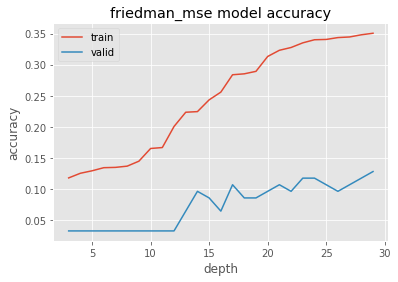

Best setting criterion=squared_error, best setting depth=16, val_acc=0.55


In [27]:
from sklearn.tree import DecisionTreeRegressor
depth_list = [i for i in range(3, 30)]
criterion_list = ['squared_error', 'friedman_mse']

best_depth = 3
best_acc = 0.0
best_criterion = 'squared_error'

for criterion in criterion_list:
    print("The Criterion is {}:".format(criterion))
    acc_train, acc_valid = [], []
    for depth_val in depth_list:
        clf = DecisionTreeRegressor(criterion=criterion, max_depth=depth_val, random_state=0)
        clf.fit(X, Y)

        y_pred_on_train = clf.predict(trainx)
        train_acc = sklearn.metrics.accuracy_score(np.argmax(y_pred_on_train, axis=1), np.argmax(trainy, axis=1))
        acc_train.append(train_acc)

        y_pred_on_valid = clf.predict(validx)
        val_acc = sklearn.metrics.accuracy_score(np.argmax(y_pred_on_valid, axis=1), np.argmax(validy, axis=1))
        acc_valid.append(val_acc)


        print("Setting depth={}, train_acc={:.2f}, val_acc={:.2f}".format(depth_val, train_acc, val_acc))
        if val_acc > best_acc:
            best_criterion = criterion
            best_acc = val_acc
            best_depth = depth_val
    plt.plot(depth_list, acc_train)
    plt.plot(depth_list, acc_valid)
    plt.title(f'{criterion} model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('depth')
    plt.legend(['train', 'valid'], loc='upper left')
    plt.show()
    

    
print("Best setting criterion={}, best setting depth={}, val_acc={:.2f}".format(best_criterion, best_depth, best_acc))

#### Testing

**Testing Decision Tree algorithm to find the best depth and setting criterion**

In [28]:
X_train_val_merge = np.vstack([trainx, validx])
y_train_val_merge = np.vstack([trainy, validy])

clf = DecisionTreeRegressor(criterion=best_criterion, max_depth=best_depth, random_state=0)
clf.fit(X_train_val_merge, y_train_val_merge)

y_pred_on_test = clf.predict(testx)
test_acc = sklearn.metrics.accuracy_score(np.argmax(y_pred_on_test, axis=1), np.argmax(testy, axis=1))


print("Best setting criterion={}, best setting depth={}, test_acc={:.2f}".format(best_criterion, best_depth, test_acc))

Best setting criterion=squared_error, best setting depth=16, test_acc=0.49


### Random Forest

#### Fine Tuning

**Using Random Forest algorithm to find the train and validation accuracy from 3 to 14 and plotting the result**

The Criterion is gini:
Setting n_estimators=1, train_acc=0.96, val_acc=0.41
Setting n_estimators=2, train_acc=0.94, val_acc=0.28
Setting n_estimators=3, train_acc=0.98, val_acc=0.47
Setting n_estimators=4, train_acc=0.97, val_acc=0.35
Setting n_estimators=5, train_acc=0.99, val_acc=0.43
Setting n_estimators=6, train_acc=0.98, val_acc=0.38
Setting n_estimators=7, train_acc=0.99, val_acc=0.43
Setting n_estimators=8, train_acc=0.99, val_acc=0.38
Setting n_estimators=9, train_acc=1.00, val_acc=0.41
Setting n_estimators=10, train_acc=1.00, val_acc=0.38
Setting n_estimators=11, train_acc=1.00, val_acc=0.38
Setting n_estimators=12, train_acc=1.00, val_acc=0.38
Setting n_estimators=13, train_acc=1.00, val_acc=0.45
Setting n_estimators=14, train_acc=1.00, val_acc=0.39
Setting n_estimators=15, train_acc=1.00, val_acc=0.44
Setting n_estimators=16, train_acc=1.00, val_acc=0.44
Setting n_estimators=17, train_acc=1.00, val_acc=0.45
Setting n_estimators=18, train_acc=1.00, val_acc=0.43
Setting n_esti

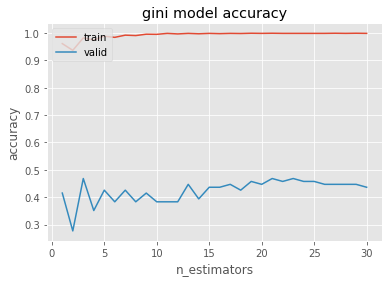

The Criterion is entropy:
Setting n_estimators=1, train_acc=0.96, val_acc=0.43
Setting n_estimators=2, train_acc=0.93, val_acc=0.33
Setting n_estimators=3, train_acc=0.98, val_acc=0.50
Setting n_estimators=4, train_acc=0.97, val_acc=0.37
Setting n_estimators=5, train_acc=0.99, val_acc=0.47
Setting n_estimators=6, train_acc=0.99, val_acc=0.39
Setting n_estimators=7, train_acc=0.99, val_acc=0.46
Setting n_estimators=8, train_acc=0.99, val_acc=0.40
Setting n_estimators=9, train_acc=1.00, val_acc=0.45
Setting n_estimators=10, train_acc=0.99, val_acc=0.41
Setting n_estimators=11, train_acc=1.00, val_acc=0.45
Setting n_estimators=12, train_acc=1.00, val_acc=0.40
Setting n_estimators=13, train_acc=1.00, val_acc=0.44
Setting n_estimators=14, train_acc=1.00, val_acc=0.43
Setting n_estimators=15, train_acc=1.00, val_acc=0.45
Setting n_estimators=16, train_acc=1.00, val_acc=0.44
Setting n_estimators=17, train_acc=1.00, val_acc=0.46
Setting n_estimators=18, train_acc=1.00, val_acc=0.43
Setting n_e

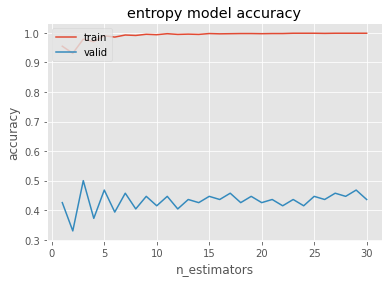

Best setting criterion=entropy, best setting n_estimators=3, val_acc=0.50


In [29]:
from sklearn.ensemble import RandomForestClassifier
# training and hyper-parameter tuning
est_list = [i for i in range(1, 31)]
criterion_list = ['gini', 'entropy']

best_est = 3
best_acc = 0.0
best_criterion = 'gini'

for criterion in criterion_list:
    print("The Criterion is {}:".format(criterion))
    acc_train, acc_valid = [], []
    for est_val in est_list:
        clf = RandomForestClassifier(criterion=criterion, n_estimators=est_val, random_state=0)
        clf.fit(X, Y)

        y_pred_on_train = clf.predict(trainx)
        train_acc = sklearn.metrics.accuracy_score(np.argmax(y_pred_on_train, axis=1), np.argmax(trainy, axis=1))
        acc_train.append(train_acc)

        y_pred_on_valid = clf.predict(validx)
        val_acc = sklearn.metrics.accuracy_score(np.argmax(y_pred_on_valid, axis=1), np.argmax(validy, axis=1))
        acc_valid.append(val_acc)

        print("Setting n_estimators={}, train_acc={:.2f}, val_acc={:.2f}".format(est_val, train_acc, val_acc))
        if val_acc > best_acc:
            best_criterion = criterion
            best_acc = val_acc
            best_est = est_val
    plt.plot(est_list, acc_train)
    plt.plot(est_list, acc_valid)
    plt.title(f'{criterion} model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('n_estimators')
    plt.legend(['train', 'valid'], loc='upper left')
    plt.show()
    

    
print("Best setting criterion={}, best setting n_estimators={}, val_acc={:.2f}".format(best_criterion, best_est, best_acc))

#### Testing

**Testing Random Forest algorithm to find the best depth and setting criterion**

In [30]:
X_train_val_merge = np.vstack([trainx, validx])
y_train_val_merge = np.vstack([trainy, validy])

rfc = RandomForestClassifier(criterion=best_criterion, n_estimators=best_est, random_state=0)
rfc.fit(X_train_val_merge, y_train_val_merge)

y_pred_on_test = rfc.predict(testx)
test_acc = sklearn.metrics.accuracy_score(np.argmax(y_pred_on_test, axis=1), np.argmax(testy, axis=1))

print("Best setting criterion={}, best setting n_estimators={}, test_acc={:.2f}".format(best_criterion, best_est, test_acc))

Best setting criterion=entropy, best setting n_estimators=3, test_acc=0.55


### Adaboost

#### Fine Tuning

**Using Adaboost algorithm to find the train and validation accuracy using 2 techniques (SAMME) (SAMME.R)**

In [31]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.multioutput import MultiOutputRegressor
# training and hyper-parameter tuning
algorithm = ['SAMME', 'SAMME.R']

base = RandomForestClassifier(criterion=best_criterion, n_estimators=best_est, random_state=0)
best_acc = 0.0
best_alg = 'SAMME'

for alg in algorithm:
    clf = AdaBoostClassifier(base_estimator=base, random_state=0, n_estimators=100, algorithm=alg)
    wrapper = MultiOutputRegressor(clf)
    wrapper.fit(X, Y)

    y_pred_on_train = wrapper.predict(trainx)
    train_acc = sklearn.metrics.accuracy_score(np.argmax(y_pred_on_train, axis=1), np.argmax(trainy, axis=1))

    y_pred_on_valid = wrapper.predict(validx)
    val_acc = sklearn.metrics.accuracy_score(np.argmax(y_pred_on_valid, axis=1), np.argmax(validy, axis=1))
    


    print("Setting algorithm={}, train_acc={:.2f}, val_acc={:.2f}".format(alg, train_acc, val_acc))
    if val_acc > best_acc:
        best_alg = alg
        best_acc = val_acc
    
print("Best setting algorithm={}, val_acc={:.2f}".format(best_alg, best_acc))

Setting algorithm=SAMME, train_acc=1.00, val_acc=0.41
Setting algorithm=SAMME.R, train_acc=1.00, val_acc=0.40
Best setting algorithm=SAMME, val_acc=0.41


#### Testing

**Testing Adaboost algorithm to find the best setting algorithm with the accuracy**

In [32]:
X_train_val_merge = np.vstack([trainx, validx])
y_train_val_merge = np.vstack([trainy, validy])

clf = AdaBoostClassifier(base_estimator=base,  random_state=0, n_estimators=100, algorithm=best_alg)
wrapper = MultiOutputRegressor(clf)
wrapper.fit(X_train_val_merge, y_train_val_merge)

test_acc = wrapper.score(testx, testy)

print("Best setting algorithm={}, test_acc={:.2f}".format(best_alg, test_acc))

Best setting algorithm=SAMME, test_acc=0.17


### SVM

In [33]:
from sklearn.svm import SVC

kernels = ['linear', 'poly', 'rbf', 'sigmoid']

best_kernel = 'linear'
best_acc = 0.0
acc_train, acc_valid = [], []

for k in kernels:
    svclassifier = SVC(kernel=k,)
    svclassifier.fit(X, np.argmax(Y, axis=1))
    
    
    y_pred_on_train = wrapper.predict(trainx)
    train_acc = sklearn.metrics.accuracy_score(np.argmax(y_pred_on_train, axis=1), np.argmax(trainy, axis=1))

    y_pred_on_valid = wrapper.predict(validx)
    val_acc = sklearn.metrics.accuracy_score(np.argmax(y_pred_on_valid, axis=1), np.argmax(validy, axis=1))
    
    
    print("Setting kernel={}, train_acc={:.2f}, val_acc={:.2f}".format(k, train_acc, val_acc))
    if val_acc > best_acc:
        best_acc = val_acc
        best_kernel = k
        
print("Best setting kernel={}, val_acc={:.2f}".format(best_kernel, best_acc))


Setting kernel=linear, train_acc=1.00, val_acc=0.96
Setting kernel=poly, train_acc=1.00, val_acc=0.96
Setting kernel=rbf, train_acc=1.00, val_acc=0.96
Setting kernel=sigmoid, train_acc=1.00, val_acc=0.96
Best setting kernel=linear, val_acc=0.96


In [34]:
X_train_val_merge = np.vstack([trainx, validx])
y_train_val_merge = np.vstack([trainy, validy])

svclassifier = SVC(kernel=best_kernel)
svclassifier.fit(X_train_val_merge, np.argmax(y_train_val_merge, axis=1))

y_pred_on_test = svclassifier.predict(testx)
test_acc = sklearn.metrics.accuracy_score(y_pred_on_test, np.argmax(testy, axis=1))

print("Best setting kernel={}, test_acc={:.2f}".format(best_kernel, test_acc))

Best setting kernel=linear, test_acc=0.76


## Predicting
**Using the best model among the previous models in testing, which is `SVC` because it has test accuarcy of 0.76**

The Hyperparameter for the random forest are:
* kernel='linear'


### Merge the training and validation

In [35]:
X_train_val_merge = np.vstack([trainx, validx])
y_train_val_merge = np.vstack([trainy, validy])

### Define and fit the model

In [36]:
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train_val_merge, np.argmax(y_train_val_merge, axis=1))

SVC(kernel='linear')

### Pridict on the test set

In [37]:
y_pred = svclassifier.predict(testx)

### Confusion Matrix

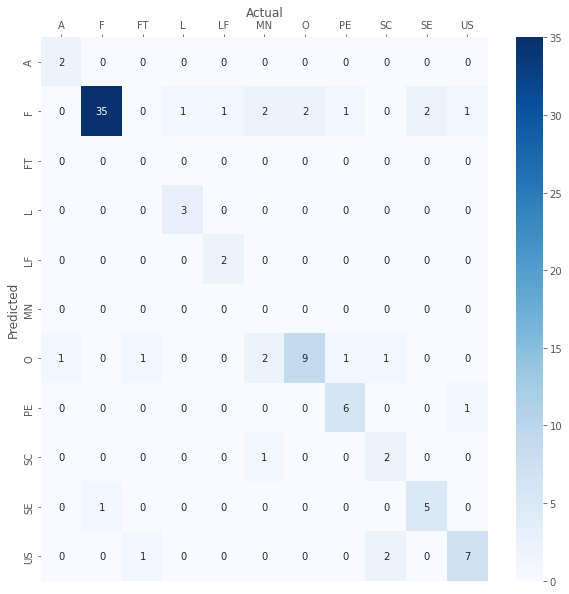

In [38]:
conf_mat = sklearn.metrics.confusion_matrix(np.argmax(testy, axis=1), y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat.T, annot=True, fmt='d',
            xticklabels=le.classes_, yticklabels=le.classes_, cmap=plt.cm.Blues)
plt.ylabel('Predicted')
plt.xlabel('Actual')
ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
ax.set_xticks(np.arange(conf_mat.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(conf_mat.shape[0]) + 0.5, minor=False)

plt.show()

**Here You can see the confusion matrix of the predicted and actual `testx`. The classes are not balanced in the test, but you can see that the diagonal is almost perfect, with some errors.**

We can see that the all actual 'F' class is predicted correctly, but not all the predicted 'F' class is correct. 

**If you divide number of correct samples `the sum of the diagnoal = 71` with the total test samples `93 samples` (71 / 93) you will get an accuracy of 76.34%**

#Conclusion

**Eventually, we dealt with Natural Language Processing of Software Requirements classification. We used 5 models (techniques) to find the most suitable model in train and test validation scores to predict another data, which are:**

* Multinomial Naive Bayes
* K-Nearest Neighbors
* Decision Tree Regressor
* Random Forest
* Adaboost
* Support Vector Classification


**Models Stats:** `from high test_acc to low`
* `SVC`:
 * `76.34%` test accuaracy
 * `96%` validation accuaracy
* `MultinomialNB`:
 * `75.27%` test accuaracy
* `KNN`:
 * `67%` test accuaracy
 * `56%` validation accuaracy
* `RandomForestClassifier`:
 * `55%` test accuaracy
 * `50%` validation accuaracy
* `DecisionTreeRegressor`:
 * `49%` test accuaracy
 * `55%` validation accuaracy
* `AdaBoostClassifier`:
 * `17%` test accuaracy
 * `41%` validation accuaracy

# Refrences

* The Course Assignments 
* Multi-Class Text Classification Model Comparison and Selection - https://towardsdatascience.com/multi-class-text-classification-model-comparison-and-selection-5eb066197568
* Comparing Support Vector Machines and Decision Trees for Text Classification - https://www.codementor.io/blog/text-classification-6mmol0q8oj
* TensorFlow YouTube Channel - https://www.youtube.com/channel/UC0rqucBdTuFTjJiefW5t-IQ
* Multinomial Logistic Regression With Python - https://machinelearningmastery.com/multinomial-logistic-regression-with-python/
* Yet Another Twitter Sentiment Analysis Part 1 — tackling class imbalance - https://towardsdatascience.com/yet-another-twitter-sentiment-analysis-part-1-tackling-class-imbalance-4d7a7f717d44
* How to Develop Multi-Output Regression Models with Python - https://machinelearningmastery.com/multi-output-regression-models-with-python/